## Description: This program predicts employee attrition.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to display all the columns in df
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#Loading the dataset
df = pd.read_csv('datasets_12204_16735_WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Numerical columns- 'Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction
,'MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'.

Cateogrical columns-Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime

In [4]:
#Lets check the number of rows and columns
df.shape

(1470, 35)

In [5]:
#Displaying all the columns/attributes
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#To check the datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
#Summary statistics of the given dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#to check missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- We can see there are no missing values

## Exploratory Data Analysis

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


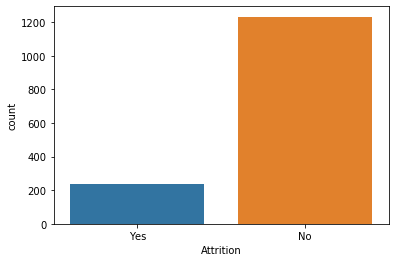

In [9]:
#Check the number of counts of employees that stayed and left the company and plotting it using countplot
sns.countplot(df['Attrition'])
print(df['Attrition'].value_counts()*100/1470)

- **We can see that 1233(83.87%) are still currently working at the company whereas 237(16.12%) of them left the company**

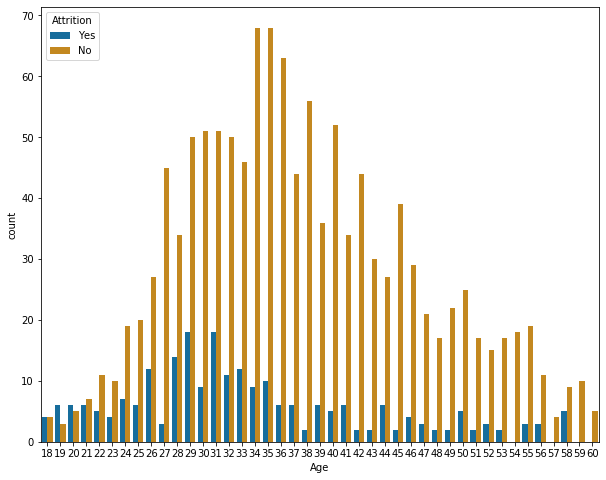

In [10]:
#show the number of employees that left and stayed by age
plt.figure(figsize = (10,8))
sns.countplot(x = 'Age',hue = 'Attrition',data = df,palette='colorblind')

- **We can see that age 28,29 and 31 are the ages that most employees left the company.**
- **After 40+ age,Attrition decreases.**
- **After 50+ age there is very minimal attrition**

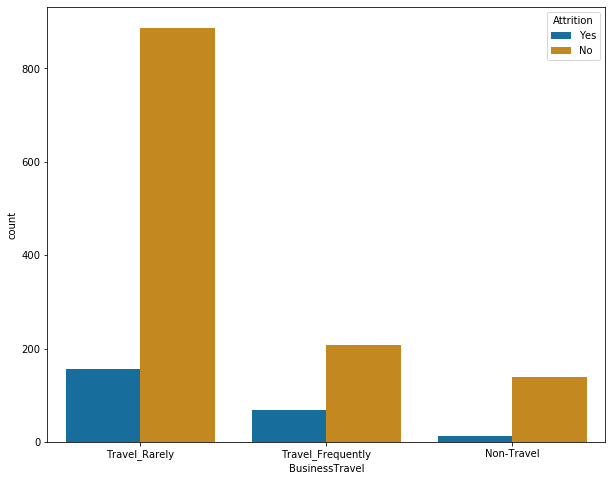

In [11]:
#Show the employees those who were engaged in business travel
plt.figure(figsize = (10,8))
sns.countplot(x = 'BusinessTravel',hue = 'Attrition',data = df,palette='colorblind')

- **We can clearly see that employees that traveled rarely are the ones that left the company**
- **Employees that traveled a lot are the least ones**

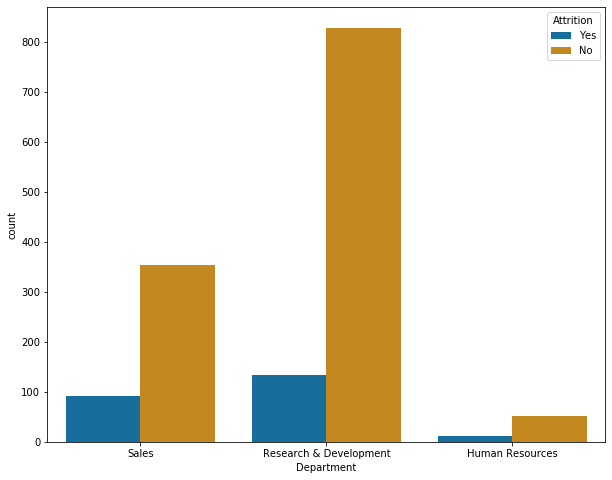

In [12]:
#Show the employees those who left the company due to there department
plt.figure(figsize = (10,8))
sns.countplot(x = 'Department',hue = 'Attrition',data = df,palette='colorblind')

- **Most employees that belonged to R&D left the company and least were from HR**

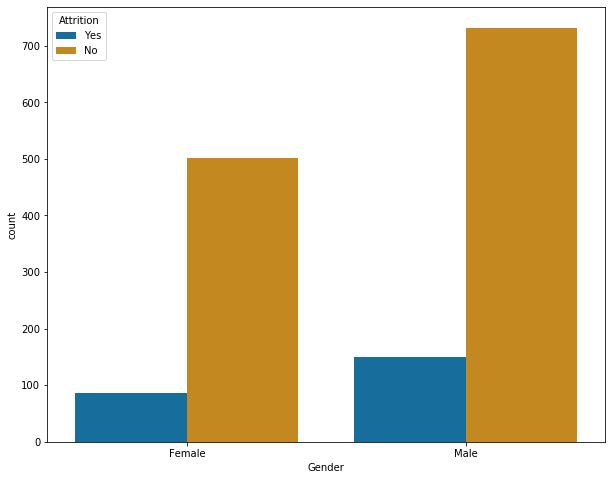

In [13]:
#Show the employees withe respect to gender those left the company
plt.figure(figsize = (10,8))
sns.countplot(x = 'Gender',hue = 'Attrition',data = df,palette='colorblind')

- **Male employees are the most to leave the company as compared to females**

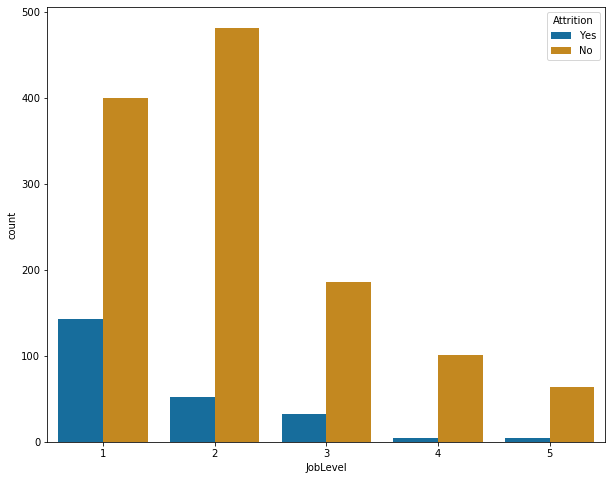

In [14]:
#Show the employees those who left the company due to there job levels
plt.figure(figsize = (10,8))
sns.countplot(x = 'JobLevel',hue = 'Attrition',data = df,palette='colorblind')

- **Employees with the associate level jobs are the ones that left the job and senior positions employees were the least**

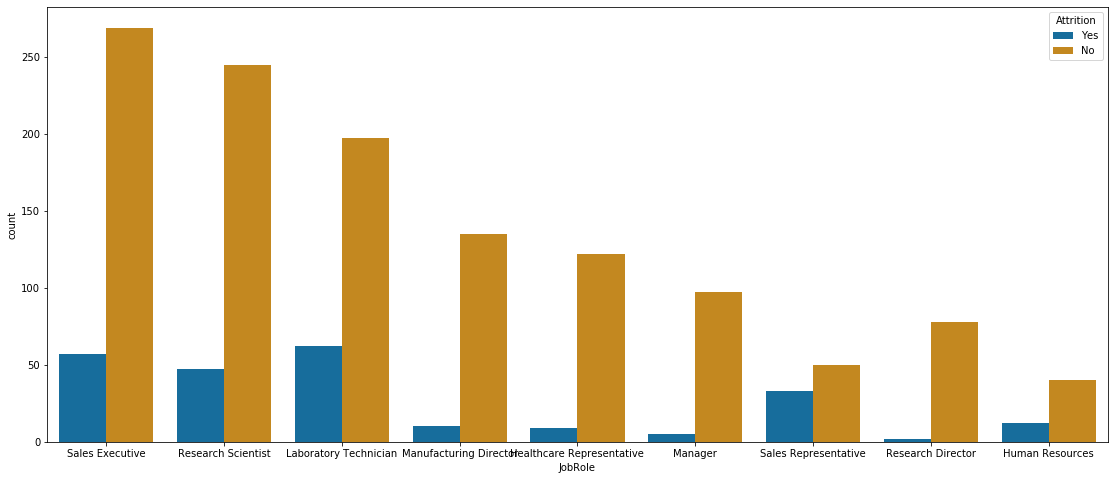

In [15]:
#Show the employees those who left the company due to there job roles
plt.figure(figsize = (19,8))
sns.countplot(x = 'JobRole',hue = 'Attrition',data = df,palette='colorblind')

- **LabTechnicians and Sales employees were the most employees who left the company**

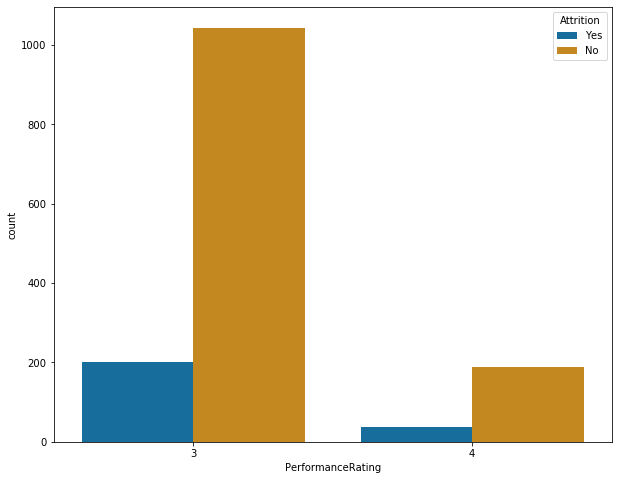

In [16]:
#Show the employees those who left the company due to there performance rating
plt.figure(figsize = (10,8))
sns.countplot(x = 'PerformanceRating',hue = 'Attrition',data = df,palette='colorblind')

- **Employees with less rating were the ones leaving the company**

In [17]:
#print all of the data-types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : '+ str(df[column].unique()))
        print(df[column].value_counts())
        print('__________________________________________________')     

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
__________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
__________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
__________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
__________________________________________________
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender

In [18]:
#removing extraneous columns
df = df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],1)

In [19]:
#checking the correlation
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


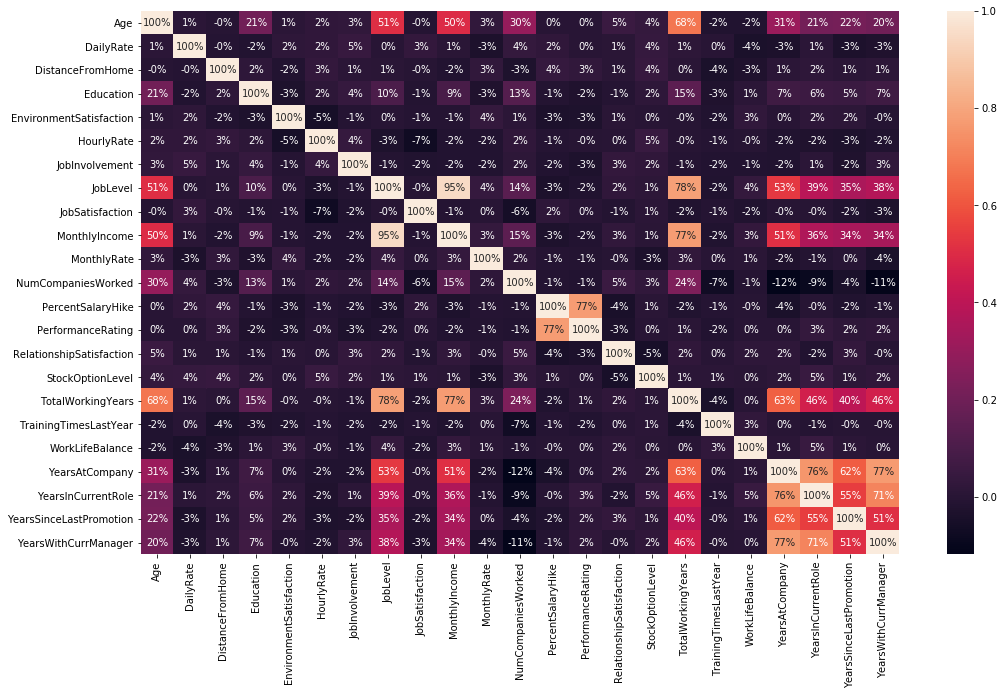

In [25]:
#plotting heatmap
plt.figure(figsize = (17,10))
sns.heatmap(df.corr(),annot = True,fmt = '.0%')

- **Monthly income and joblevel have a very high correlation(95%)**
- **Job level and total working years a high correlation(78%)**
- **Total working years and Monthly income have a high correlation(77%)**
- **Performance Rating and %SalaryHike have a high correlation(77%)**
- **Yearswithcurrmanager and Yearsatcompany have a high correaltion(77%)**
- **Age and total working years have a high correaltion(68%)**

## Data Preparation

In [27]:
#encoding the data
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtypes == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


## Model Building

In [34]:
y = df['Attrition']
X = df.drop('Attrition',1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Random Forest

In [38]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
rf.fit(X_train,y_train)

#prediction
y_pred = rf.predict(X_test)

In [41]:
#checking the score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[367  57]
 [  4  13]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       424
           1       0.19      0.76      0.30        17

    accuracy                           0.86       441
   macro avg       0.59      0.82      0.61       441
weighted avg       0.96      0.86      0.90       441



In [40]:
#accuracy score on training data
rf.score(X_train,y_train)

0.9854227405247813

In [42]:
#accuracy score on testing data
accuracy_score(y_pred,y_test)

0.8616780045351474

## Gradient Boosting

In [51]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

#prediction
y_pred = gb.predict(X_test)

In [52]:
#checking the score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[363  45]
 [  8  25]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       408
           1       0.36      0.76      0.49        33

    accuracy                           0.88       441
   macro avg       0.67      0.82      0.71       441
weighted avg       0.93      0.88      0.90       441



## Adaptive Boosting

In [53]:
#Adaptive boosting
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()
ad.fit(X_train,y_train)

#prediction
y_pred = ad.predict(X_test)

In [54]:
#checking the score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[356  44]
 [ 15  26]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       400
           1       0.37      0.63      0.47        41

    accuracy                           0.87       441
   macro avg       0.67      0.76      0.70       441
weighted avg       0.90      0.87      0.88       441



Inference:
- **Random Forest got an accuracy of 86%**
- **Gradient Boosting got an accuracy of 88%**
- **Adaptive Boosting got an accuracy of 87%**